<a href="https://colab.research.google.com/github/JanMusa/Invoice-Delay-Model/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

sns.set(style="whitegrid")


In [ ]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.dtypes
df.shape
df.isnull().sum()


,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0
species,0


In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
mean_values = df.describe().loc['mean']
std_values = df.describe().loc['std']

print("Highest mean:", mean_values.idxmax())
print("Lowest std:", std_values.idxmin())

Highest mean: sepal length (cm)
Lowest std: sepal width (cm)


In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


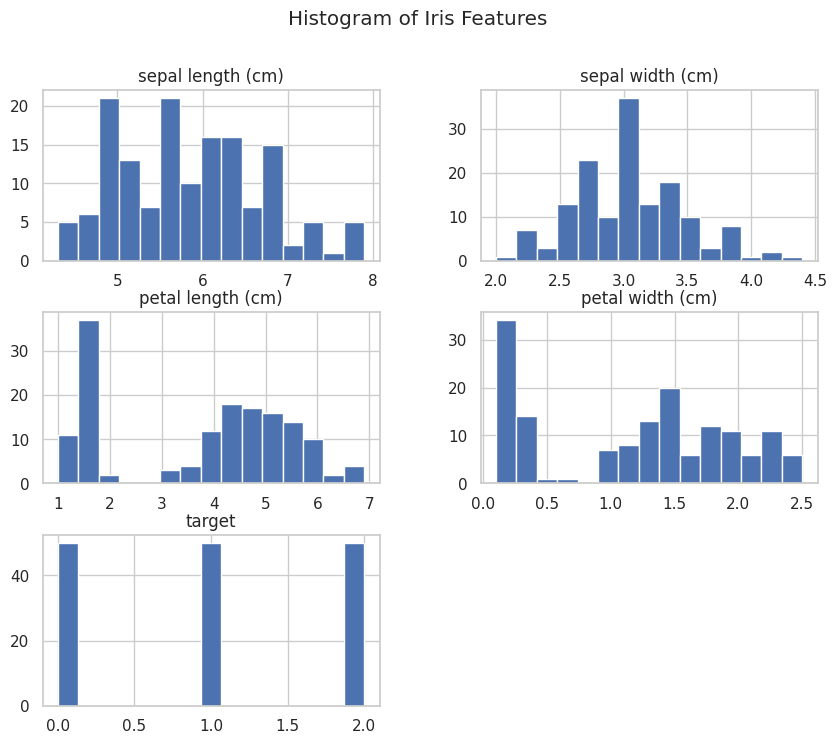

In [ ]:
df.hist(figsize=(10,8), bins=15)
plt.suptitle("Histogram of Iris Features")
plt.show()

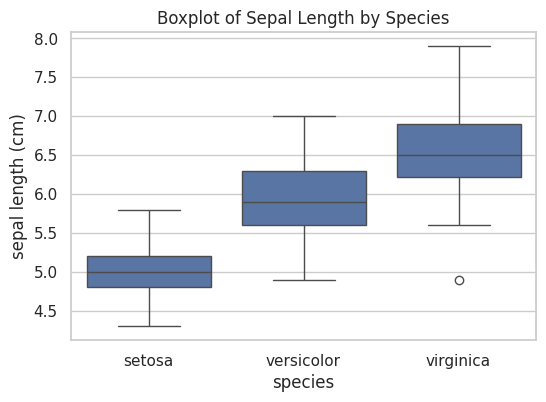

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title("Boxplot of Sepal Length by Species")
plt.show()

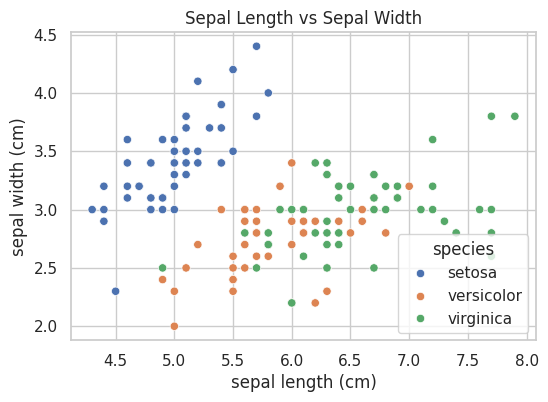

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='sepal length (cm)',
    y='sepal width (cm)',
    hue='species'
)
plt.title("Sepal Length vs Sepal Width")
plt.show()


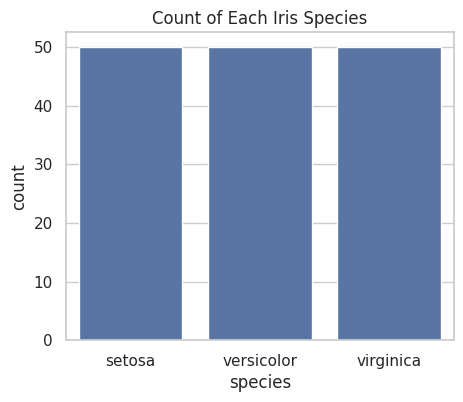

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='species', data=df)
plt.title("Count of Each Iris Species")
plt.show()


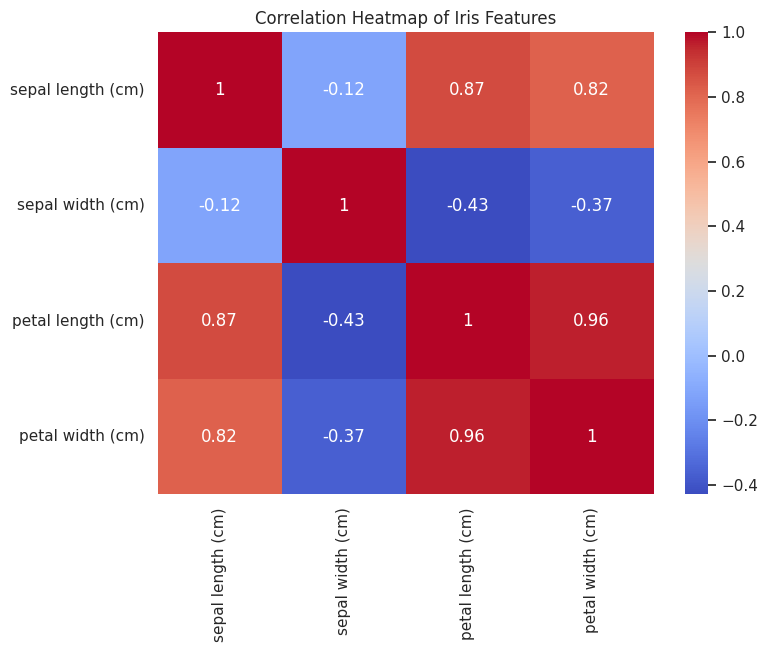

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.iloc[:, :-2].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Iris Features")
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv(
    "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

if df['Cabin'].isnull().sum() / len(df) > 0.5:
    df.drop(columns=['Cabin'], inplace=True)

df.isnull().sum()


/tmp/ipython-input-289891975.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-289891975.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode binary categorical column
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-hot encode multi-class column
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Display results
df.head()
df.shape


(891, 12)